# BertonGan MNIST Experiments

In [1]:
# check if in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
	import os
	sys.path.append(os.path.abspath('berton-gan'))

### Download the MNIST data

the first thing we have to do is download the MNIST dataset if it doesn't exist.

/home/herb/.miniconda3/envs/school/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


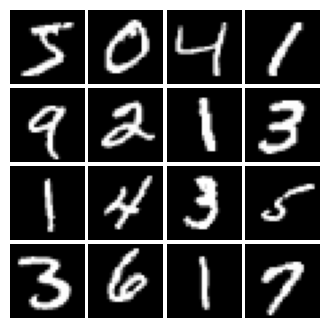

In [2]:
from src import download_mnist_data
from experiments import show_images

# download mnist data if it doesn't already exist
data = download_mnist_data()

# print some examples
k = 16
first_k_imgs = [data[i][0] for i in range(k)]
show_images(first_k_imgs, grayscale=True)

### Constructing our BertonGan

Next, we must make our BertonGan, and store it in a variable

In [3]:
from src import BertonGan

# lets make our BertonGan for mnist
berton_gan = BertonGan('mnist')

### Training the BertonGan

Next, we train our BertonGan!

In [4]:
from src import MnistLoader, train_all_at_once

TRAIN = False # set to False if you don't want to train your berton_gan

if TRAIN:
	# lets train our Berton Gan on mnist
	n, N, epochs = 3, 16, 5
	train_loader = MnistLoader(n, N)
	train_all_at_once(berton_gan, train_loader, epochs=epochs, verbose=True)


### Loading a BertonGan

If we didn't train one, we should load in a BertonGan, so our weights aren't random

In [5]:
from experiments.utils import load_berton_gan

if not TRAIN:
	# load our bertongan from .pt files
	berton_gan = load_berton_gan('mnist_experiment_herb_1/10')


### Pick a random index

To generate an image we should first pick a random image in our dataset

label is a 3


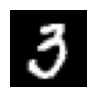

In [6]:
import torch

# pick a random index
random_idx = torch.randint(0, len(data), (1,))[0]

# get the image and label out
img, label = data[random_idx]

# show the image
print(f'label is a {label}')
show_images([img], grayscale=True)


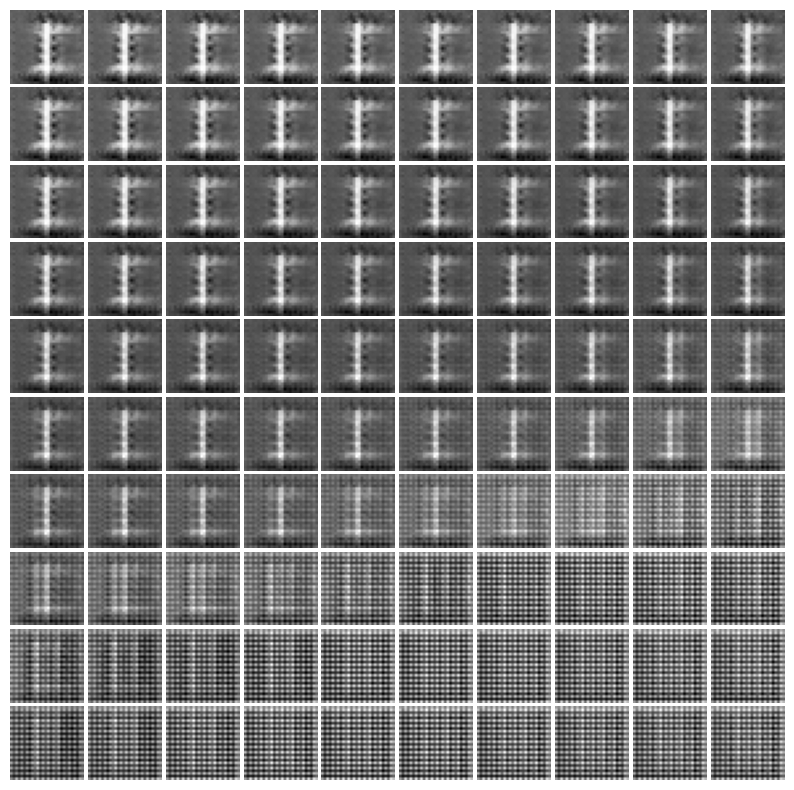

In [8]:
import numpy as np

berton_gan.eval()

images = []
for y in np.linspace(-2, 1, 10):
	for x in np.linspace(-2, 1, 10):
		images.append(
			berton_gan.generate_image_latent(img, torch.Tensor([x, y]))
		)

show_images(images, grayscale=True)